In [54]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt


In [55]:
df = pl.read_parquet(r'C:\Users\dadoi\OneDrive\Desktop\davide\example_data_week5\output\extract\polygon_df/plot_10.parquet')

In [56]:
df = df.drop_nans().drop_nulls()
print(len(df['Yw'].unique()))
df

435073


Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str
563627.910959,5.7130e6,0.025641,0.066758,0.027171,0.176971,0.565734,187.983521,"""plot_10""",19.549255,7.464041,-34.030186,34.839137,0.511347,60.700001,2.925676,119.372875,119.372875,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif"""
563627.918263,5.7130e6,0.029792,0.064916,0.026853,0.173094,0.568382,187.985687,"""plot_10""",19.547089,7.456737,-34.030278,34.837663,0.511318,60.700001,2.925881,119.384641,119.384641,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif"""
563627.925567,5.7130e6,0.033559,0.065264,0.026341,0.169603,0.558657,187.987869,"""plot_10""",19.544907,7.449433,-34.03037,34.83619,0.511289,60.709999,2.926087,119.396408,119.396408,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif"""
563627.932871,5.7130e6,0.03324,0.065937,0.027149,0.169726,0.553099,187.986145,"""plot_10""",19.546631,7.442129,-34.030461,34.834718,0.511344,60.700001,2.926292,119.408176,119.408176,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif"""
563627.940175,5.7130e6,0.032239,0.06889,0.028558,0.175562,0.565112,187.983994,"""plot_10""",19.548782,7.434825,-34.030553,34.833248,0.511409,60.700001,2.926497,119.419945,119.419945,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563633.855106,5.7130e6,0.018711,0.063605,0.021769,0.132484,0.464879,188.00441,"""plot_10""",19.517563,11.707394,-3.552832,12.23461,1.010867,32.080002,1.865433,34.848299,34.848299,563645.5625,5.713034e6,39.555054,72.033119,"""IMG_0009_6.tif"""
563633.862411,5.7130e6,0.023229,0.072117,0.02408,0.158744,0.542142,188.000473,"""plot_10""",19.5215,11.700089,-3.552923,12.227647,1.011214,32.060001,1.865613,34.858649,34.858649,563645.5625,5.713034e6,39.555054,72.033119,"""IMG_0009_6.tif"""
563633.869715,5.7130e6,0.0226,0.062403,0.022518,0.166937,0.526171,187.996368,"""plot_10""",19.525604,11.692785,-3.553015,12.220685,1.011564,32.040001,1.865794,34.86901,34.86901,563645.5625,5.713034e6,39.555054,72.033119,"""IMG_0009_6.tif"""


In [57]:
print(len(df['Xw'].unique()))


497385


In [58]:
df = df.with_columns(
    (pl.col("delta_z")+pl.col("elev")).alias("zcam")
)
drone_positions = (
    df.select(["xcam", "ycam","zcam", ])      # keep only the two columns of interest
      .unique()                # drop duplicate rows
)
drone_positions

xcam,ycam,zcam
f32,f32,f32
563630.125,5.713049e6,207.606277
563643.9375,5713027.5,207.55011
563605.125,5.713041e6,207.576843
563624.4375,5713038.5,207.564835
563636.375,5713058.5,207.585083
…,…,…
563623.1875,5713036.5,207.586411
563623.375,5.713023e6,207.563644
563635.25,5713042.5,207.608353


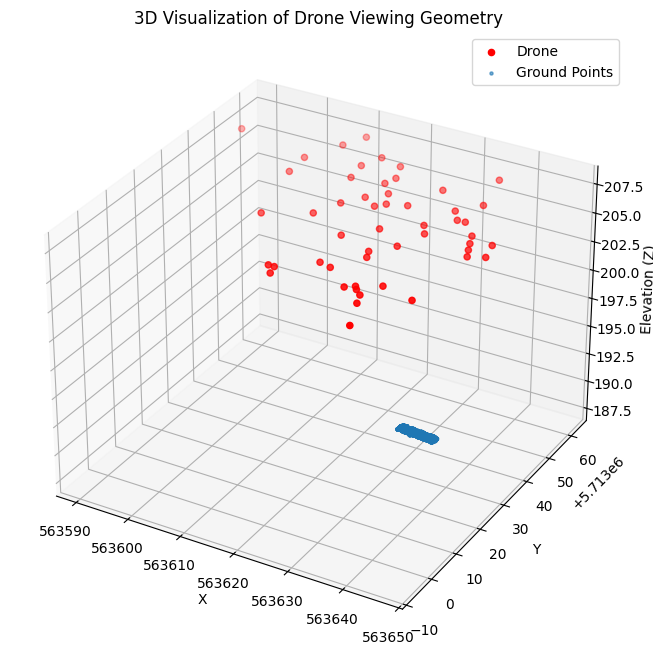

In [59]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
subsample = df.sample(10000)
# Drone position
ax.scatter(drone_positions["xcam"], drone_positions["ycam"], drone_positions["zcam"], c='red', label="Drone")
ax.scatter(subsample["Xw"], subsample["Yw"], subsample["elev"], s=5, alpha=0.6, label="Ground Points")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
ax.set_title("3D Visualization of Drone Viewing Geometry")
ax.legend()


Min angle (ground-origin, cross): 157.29°
Max angle (ground-origin, cross): 38.65°


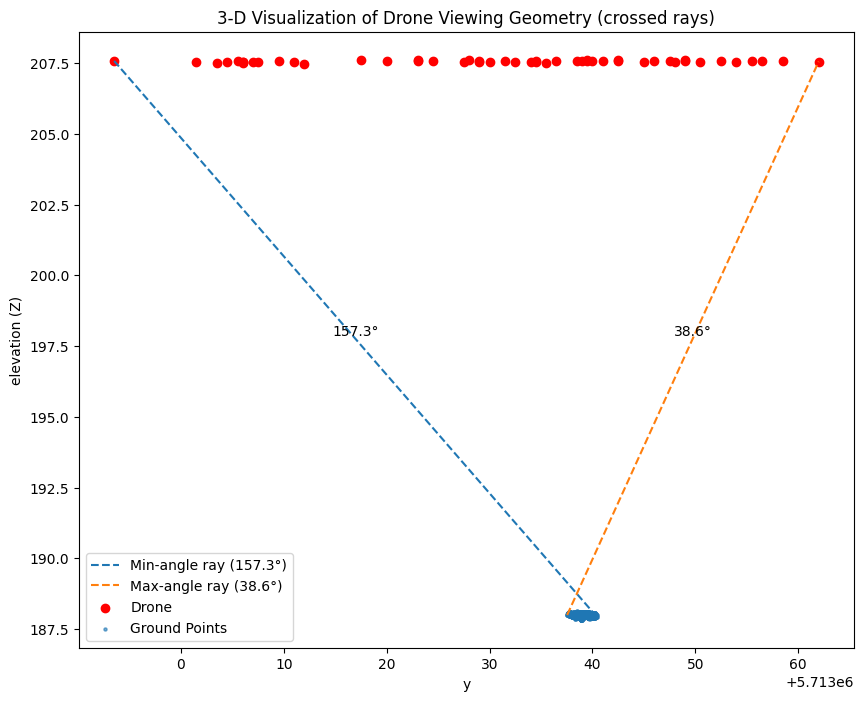

In [60]:
# ------------------------------------------------------------
# 3-D viewing geometry with crossed ground-origin rays
# ------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# subsample for faster scatter rendering
subsample = df.sample(10_000)

# ── locate extrema ───────────────────────────────────────────
min_row_drone = drone_positions.filter(
    pl.col("ycam") == drone_positions["ycam"].min()
)
max_row_drone = drone_positions.filter(
    pl.col("ycam") == drone_positions["ycam"].max()
)

min_row_field = subsample.filter(
    pl.col("Yw") == subsample["Yw"].min()
)
max_row_field = subsample.filter(
    pl.col("Yw") == subsample["Yw"].max()
)

# ── pull scalars ----------------------------------------------------------
y_drone_min, z_drone_min = (
    min_row_drone["ycam"].item(),
    min_row_drone["zcam"].item(),
)
y_drone_max, z_drone_max = (
    max_row_drone["ycam"].item(),
    max_row_drone["zcam"].item(),
)

y_ground_min, z_ground_min = (
    min_row_field["Yw"].item(),
    min_row_field["elev"].item(),
)
y_ground_max, z_ground_max = (
    max_row_field["Yw"].item(),
    max_row_field["elev"].item(),
)

# ── ground-origin vectors (cross-paired) ----------------------
# min-ray:   left-drone → right-ground   (ground is origin)
dy_min_g = y_drone_min - y_ground_max
dz_min_g = z_drone_min - z_ground_max

# max-ray:   right-drone → left-ground   (ground is origin)
dy_max_g = y_drone_max - y_ground_min
dz_max_g = z_drone_max - z_ground_min

angle_min_g = np.degrees(np.arctan2(dz_min_g, dy_min_g))
angle_max_g = np.degrees(np.arctan2(dz_max_g, dy_max_g))

print(f"Min angle (ground-origin, cross): {angle_min_g:.2f}°")
print(f"Max angle (ground-origin, cross): {angle_max_g:.2f}°")

# ── plot crossed rays (ground → drone) ------------------------
ax.plot(
    [y_ground_max, y_drone_min],
    [z_ground_max, z_drone_min],
    "--",
    label=f"Min-angle ray ({angle_min_g:.1f}°)",
)
ax.plot(
    [y_ground_min, y_drone_max],
    [z_ground_min, z_drone_max],
    "--",
    label=f"Max-angle ray ({angle_max_g:.1f}°)",
)

# annotate angles at mid-points
xm_min, zm_min = (
    (y_ground_max + y_drone_min) / 2,
    (z_ground_max + z_drone_min) / 2,
)
xm_max, zm_max = (
    (y_ground_min + y_drone_max) / 2,
    (z_ground_min + z_drone_max) / 2,
)
ax.text(xm_min, zm_min, f"{angle_min_g:.1f}°", ha="center", va="bottom")
ax.text(xm_max, zm_max, f"{angle_max_g:.1f}°", ha="center", va="bottom")

# ── scatter the raw points -----------------------------------
ax.scatter(
    drone_positions["ycam"],
    drone_positions["zcam"],
    c="red",
    label="Drone",
)
ax.scatter(
    subsample["Yw"],
    subsample["elev"],
    s=5,
    alpha=0.6,
    label="Ground Points",
)

# ── axes, title, legend --------------------------------------
ax.set_xlabel("y")
ax.set_ylabel("elevation (Z)")
ax.set_title("3-D Visualization of Drone Viewing Geometry (crossed rays)")
ax.legend()
plt.show()


Min angle (ground-origin, cross): 155.96°
Max angle (ground-origin, cross): 44.92°


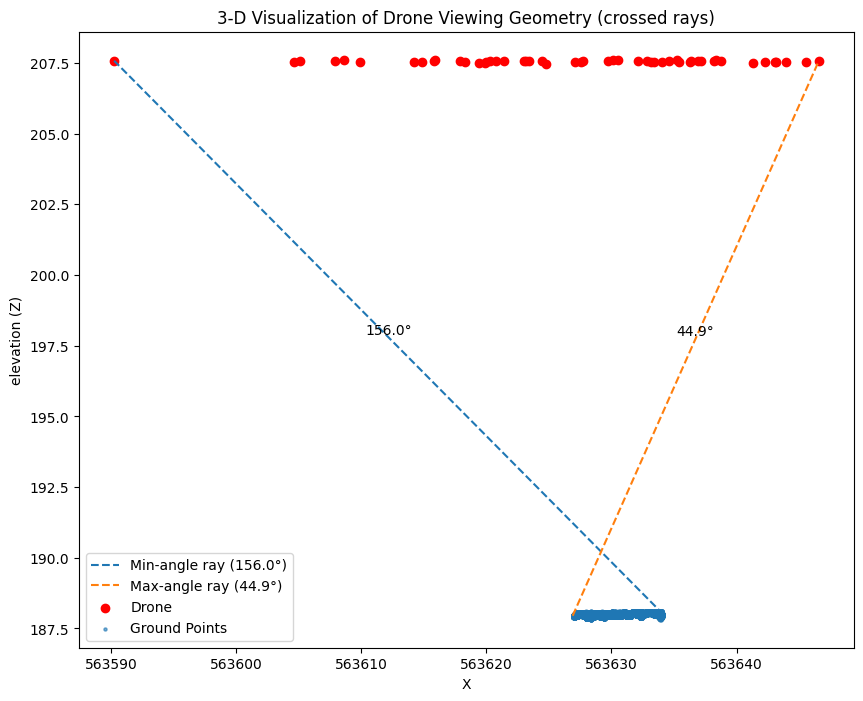

In [61]:
# ------------------------------------------------------------
# 3-D viewing geometry with crossed ground-origin rays
# ------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# subsample for faster scatter rendering
subsample = df.sample(100_000)

# ── locate extrema ───────────────────────────────────────────
min_row_drone = drone_positions.filter(
    pl.col("xcam") == drone_positions["xcam"].min()
)
max_row_drone = drone_positions.filter(
    pl.col("xcam") == drone_positions["xcam"].max()
)

min_row_field = subsample.filter(
    pl.col("Xw") == subsample["Xw"].min()
)
max_row_field = subsample.filter(
    pl.col("Xw") == subsample["Xw"].max()
)

# ── pull scalars ----------------------------------------------------------
y_drone_min, z_drone_min = (
    min_row_drone["xcam"].item(),
    min_row_drone["zcam"].item(),
)
y_drone_max, z_drone_max = (
    max_row_drone["xcam"].item(),
    max_row_drone["zcam"].item(),
)

y_ground_min, z_ground_min = (
    min_row_field["Xw"].item(),
    min_row_field["elev"].item(),
)
y_ground_max, z_ground_max = (
    max_row_field["Xw"].item(),
    max_row_field["elev"].item(),
)

# ── ground-origin vectors (cross-paired) ----------------------
# min-ray:   left-drone → right-ground   (ground is origin)
dy_min_g = y_drone_min - y_ground_max
dz_min_g = z_drone_min - z_ground_max

# max-ray:   right-drone → left-ground   (ground is origin)
dy_max_g = y_drone_max - y_ground_min
dz_max_g = z_drone_max - z_ground_min

angle_min_g = np.degrees(np.arctan2(dz_min_g, dy_min_g))
angle_max_g = np.degrees(np.arctan2(dz_max_g, dy_max_g))

print(f"Min angle (ground-origin, cross): {angle_min_g:.2f}°")
print(f"Max angle (ground-origin, cross): {angle_max_g:.2f}°")

# ── plot crossed rays (ground → drone) ------------------------
ax.plot(
    [y_ground_max, y_drone_min],
    [z_ground_max, z_drone_min],
    "--",
    label=f"Min-angle ray ({angle_min_g:.1f}°)",
)
ax.plot(
    [y_ground_min, y_drone_max],
    [z_ground_min, z_drone_max],
    "--",
    label=f"Max-angle ray ({angle_max_g:.1f}°)",
)

# annotate angles at mid-points
xm_min, zm_min = (
    (y_ground_max + y_drone_min) / 2,
    (z_ground_max + z_drone_min) / 2,
)
xm_max, zm_max = (
    (y_ground_min + y_drone_max) / 2,
    (z_ground_min + z_drone_max) / 2,
)
ax.text(xm_min, zm_min, f"{angle_min_g:.1f}°", ha="center", va="bottom")
ax.text(xm_max, zm_max, f"{angle_max_g:.1f}°", ha="center", va="bottom")

# ── scatter the raw points -----------------------------------
ax.scatter(
    drone_positions["xcam"],
    drone_positions["zcam"],
    c="red",
    label="Drone",
)
ax.scatter(
    subsample["Xw"],
    subsample["elev"],
    s=5,
    alpha=0.6,
    label="Ground Points",
)

# ── axes, title, legend --------------------------------------
ax.set_xlabel("X")
ax.set_ylabel("elevation (Z)")
ax.set_title("3-D Visualization of Drone Viewing Geometry (crossed rays)")
ax.legend()
plt.show()


shape: (1, 3)
┌───────────┬───────────┬────────────┐
│ xcam      ┆ ycam      ┆ zcam       │
│ ---       ┆ ---       ┆ ---        │
│ f32       ┆ f32       ┆ f32        │
╞═══════════╪═══════════╪════════════╡
│ 563590.25 ┆ 5713052.5 ┆ 207.579422 │
└───────────┴───────────┴────────────┘


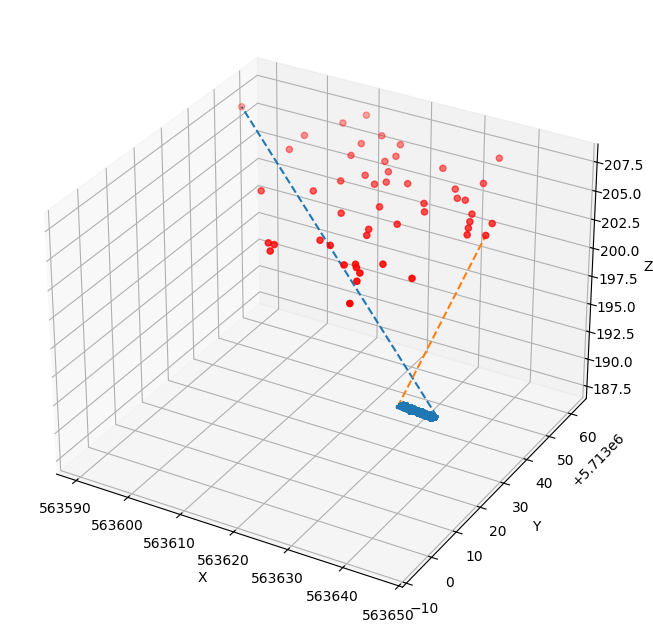

In [62]:
# --- 3-D crossed–ray visual ------------------------------------------------
fig = plt.figure(figsize=(10, 8))
ax  = fig.add_subplot(111, projection="3d")

g_left  = df.sort('Xw').row(0)
g_right = df.sort('Xw').row(-1)


d_left = drone_positions.filter(
    pl.col("xcam") == drone_positions["xcam"].min()
)
d_right = drone_positions.filter(
    pl.col("xcam") == drone_positions["xcam"].max()
)



g_left = subsample.filter(
    pl.col("Xw") == subsample["Xw"].min()
)
g_right = subsample.filter(
    pl.col("Xw") == subsample["Xw"].max()
)
# ❶ scatter clouds
ax.scatter(subsample["Xw"], subsample["Yw"], subsample["elev"], s=2, alpha=.25)
ax.scatter(drone_positions["xcam"], drone_positions["ycam"],
           drone_positions["zcam"], c="red", label="Drone")

# ❷ crossed ground-origin rays
print(d_left)
ax.plot([g_right["Xw"], d_left["xcam"]],  [g_right["Yw"], d_left["ycam"]],
        [g_right["elev"], d_left["zcam"]],  "--")
ax.plot([g_left["Xw"],  d_right["xcam"]], [g_left["Yw"],  d_right["ycam"]],
        [g_left["elev"], d_right["zcam"]], "--")

ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
plt.show()


In [63]:
import plotly.graph_objects as go

dx_l, dy_l, dz_l = drone_positions.filter(
    pl.col("xcam") == drone_positions["xcam"].min()
).select(["xcam", "ycam", "zcam"]).row(0)

dx_r, dy_r, dz_r = drone_positions.filter(
    pl.col("xcam") == drone_positions["xcam"].max()
).select(["xcam", "ycam", "zcam"]).row(0)

gx_l, gy_l, gz_l = subsample.filter(
    pl.col("Xw") == subsample["Xw"].min()
).select(["Xw", "Yw", "elev"]).row(0)

gx_r, gy_r, gz_r = subsample.filter(
    pl.col("Xw") == subsample["Xw"].max()
).select(["Xw", "Yw", "elev"]).row(0)


fig = go.Figure([
    go.Scatter3d(  # ground cloud
        x=subsample["Xw"], y=subsample["Yw"], z=subsample["elev"],
        mode="markers", marker=dict(size=2, opacity=0.25), name="Ground"),
    go.Scatter3d(  # drone positions
        x=drone_positions["xcam"], y=drone_positions["ycam"], z=drone_positions["zcam"],
        mode="markers", marker=dict(size=4, color="red"), name="Drone"),
    go.Scatter3d(  # g_right → d_left  (min-angle ray)
        x=[gx_r, dx_l], y=[gy_r, dy_l], z=[gz_r, dz_l],
        mode="lines", line=dict(dash="dash"), name="Min-angle ray"),
    go.Scatter3d(  # g_left  → d_right (max-angle ray)
        x=[gx_l, dx_r], y=[gy_l, dy_r], z=[gz_l, dz_r],
        mode="lines", line=dict(dash="dash"), name="Max-angle ray")
])

fig.update_layout(
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    width=900, height=700, margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()


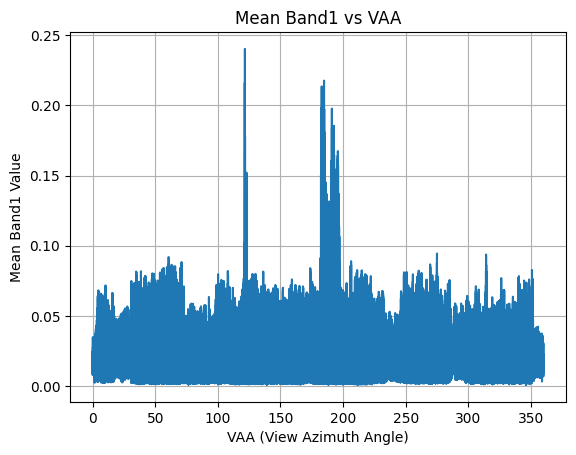

In [64]:

vaa_groupimg = (
    df.group_by("vaa")
    .agg(pl.col("band1").mean().alias("mean_band1"))
    .sort("vaa")
)

# Extract data for plotting
vaa_values = vaa_groupimg["vaa"].to_numpy()
band1_means = vaa_groupimg["mean_band1"].to_numpy()

# Plot
import matplotlib.pyplot as plt

plt.plot(vaa_values, band1_means)
plt.xlabel("VAA (View Azimuth Angle)")
plt.ylabel("Mean Band1 Value")
plt.title("Mean Band1 vs VAA")
plt.grid(True)
plt.show()


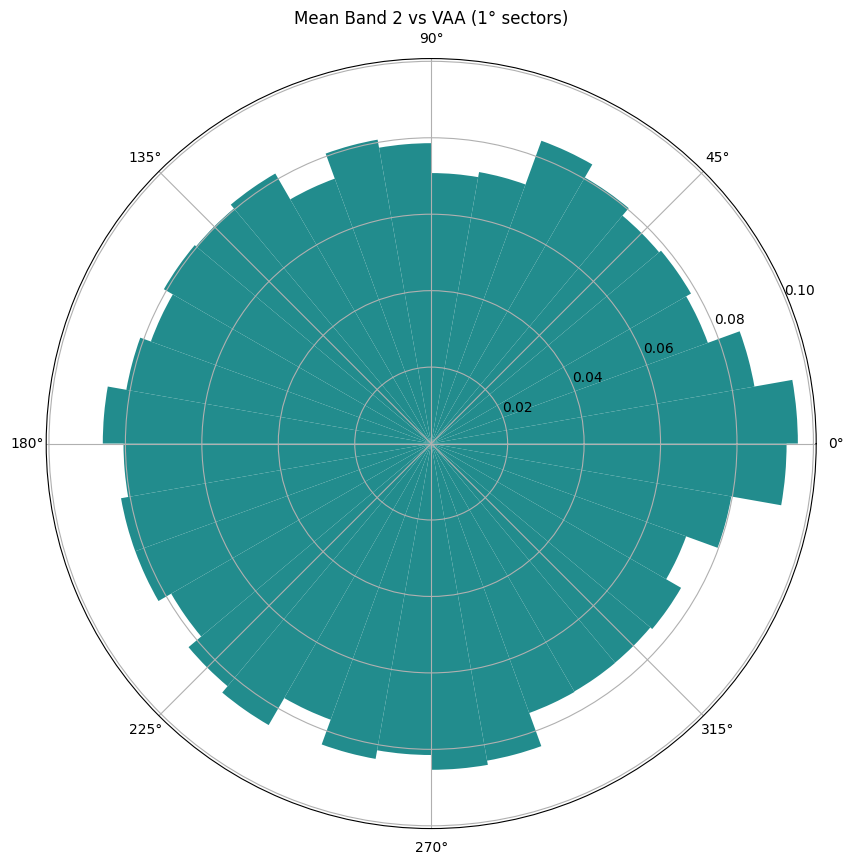

In [65]:
from numpy.linalg import norm
import numpy as np, matplotlib.pyplot as plt


width = 10                                     # bin width [°]
edges  = np.arange(0, 360 + width, width)
centres = edges[:-1] + width/2
bins = np.digitize(vaa_values, edges) - 1       # 0-based indices

band1_normalized = (band1_means - band1_means.min()) / (band1_means.max() - band1_means.min())
counts = np.bincount(bins, minlength=len(centres))
sums   = np.bincount(bins, weights=band1_normalized, minlength=len(centres))
mean_by_sector = np.where(counts > 0, sums / counts, 0)

fig = plt.figure(figsize=(10, 10))
ax  = fig.add_subplot(111, projection='polar')

ax.bar(np.deg2rad(centres),
       mean_by_sector,
       width=np.deg2rad(width),
       align='center',
       color=plt.cm.viridis(norm(mean_by_sector)))
ax.set_title('Mean Band 2 vs VAA (1° sectors)')
plt.show()



In [66]:
df

Xw,Yw,band1,band2,band3,band4,band5,elev,plot_id,delta_z,delta_x,delta_y,distance_xy,angle_rad,vza,vaa_rad,vaa_temp,vaa,xcam,ycam,sunelev,saa,path,zcam
f64,f64,f32,f32,f32,f32,f32,f32,str,f32,f64,f64,f64,f32,f32,f64,f64,f64,f32,f32,f32,f32,str,f32
563627.910959,5.7130e6,0.025641,0.066758,0.027171,0.176971,0.565734,187.983521,"""plot_10""",19.549255,7.464041,-34.030186,34.839137,0.511347,60.700001,2.925676,119.372875,119.372875,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif""",207.532776
563627.918263,5.7130e6,0.029792,0.064916,0.026853,0.173094,0.568382,187.985687,"""plot_10""",19.547089,7.456737,-34.030278,34.837663,0.511318,60.700001,2.925881,119.384641,119.384641,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif""",207.532776
563627.925567,5.7130e6,0.033559,0.065264,0.026341,0.169603,0.558657,187.987869,"""plot_10""",19.544907,7.449433,-34.03037,34.83619,0.511289,60.709999,2.926087,119.396408,119.396408,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif""",207.532776
563627.932871,5.7130e6,0.03324,0.065937,0.027149,0.169726,0.553099,187.986145,"""plot_10""",19.546631,7.442129,-34.030461,34.834718,0.511344,60.700001,2.926292,119.408176,119.408176,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif""",207.532776
563627.940175,5.7130e6,0.032239,0.06889,0.028558,0.175562,0.565112,187.983994,"""plot_10""",19.548782,7.434825,-34.030553,34.833248,0.511409,60.700001,2.926497,119.419945,119.419945,563635.375,5713004.5,33.422775,48.256004,"""IMG_0089_6.tif""",207.532776
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
563633.855106,5.7130e6,0.018711,0.063605,0.021769,0.132484,0.464879,188.00441,"""plot_10""",19.517563,11.707394,-3.552832,12.23461,1.010867,32.080002,1.865433,34.848299,34.848299,563645.5625,5.713034e6,39.555054,72.033119,"""IMG_0009_6.tif""",207.521973
563633.862411,5.7130e6,0.023229,0.072117,0.02408,0.158744,0.542142,188.000473,"""plot_10""",19.5215,11.700089,-3.552923,12.227647,1.011214,32.060001,1.865613,34.858649,34.858649,563645.5625,5.713034e6,39.555054,72.033119,"""IMG_0009_6.tif""",207.521973
563633.869715,5.7130e6,0.0226,0.062403,0.022518,0.166937,0.526171,187.996368,"""plot_10""",19.525604,11.692785,-3.553015,12.220685,1.011564,32.040001,1.865794,34.86901,34.86901,563645.5625,5.713034e6,39.555054,72.033119,"""IMG_0009_6.tif""",207.521973


In [115]:
vza_bins = np.arange(0, 65, 10)
vaa_bins = np.arange(0, 370, 45)

#
vza_idx = np.digitize(df['vza'], vza_bins) - 1
vaa_idx = np.digitize(df['vaa'], vaa_bins) - 1
print(len(vza_idx))
print(len(vaa_idx))


df = df.with_columns([
    pl.col("vza").cut(breaks=vza_bins).alias("vza_bin"),
    pl.col("vaa").cut(breaks=vaa_bins).alias("vaa_bin")
])

agg_df = (
    df.group_by(["vza_bin", "vaa_bin"])
      .agg(pl.col("band5").mean().alias("mean_band5"))
      .sort(["vza_bin", "vaa_bin"])
)

pivoted = (
    agg_df.pivot(values="mean_band5",
                 index="vza_bin",
                 on="vaa_bin")
)

Z = (pivoted
     .drop("vza_bin")
     .fill_null(np.nan)
     .with_columns(pl.all().cast(pl.Float64))
     .to_numpy()
)

Z

6357398
6357398


array([[0.44104236, 0.45171869, 0.45972127, 0.44525042, 0.45658824,
        0.47834483, 0.49531356, 0.45991713],
       [       nan, 0.41291392, 0.41637284, 0.41649458, 0.45989946,
               nan, 0.54491204, 0.54200405],
       [0.45491046, 0.42072862, 0.44912982, 0.44944331, 0.52556622,
        0.53394032, 0.48200947, 0.49647337],
       [0.44110239, 0.4654018 , 0.42368358, 0.43408081, 0.46995994,
        0.47749656, 0.42013851, 0.42569593],
       [       nan, 0.52146661, 0.42936444, 0.43055406, 0.45829281,
        0.44768307, 0.49380404,        nan],
       [       nan,        nan, 0.41879773, 0.45163691, 0.4692665 ,
               nan,        nan,        nan],
       [       nan,        nan, 0.44301072, 0.43168396,        nan,
               nan,        nan,        nan]])

In [116]:
# --- define true *edges* in one line each -----------------
vza_edges = np.arange(0, 65 + 10, 10)          # 0, 5, …, 60, 65   → 14 edges
vaa_edges = np.arange(0, 361, 45)          # 0, 10, … , 360  → 37 edges

# --- number of bins ( = Z shape ) --------------------------
Nr      = len(vza_edges)  - 1                # 14 – 1 = 13 rows
Ntheta  = len(vaa_edges)  - 1                # 37 – 1 = 36 cols
Theta, R  = np.meshgrid(np.deg2rad(vaa_edges), vza_edges)  # (14, 37)
print("Z :", Z.shape)      # (13, 36)
print("Θ :", Theta.shape)  # (14, 37)
print("R :", R.shape)      # (14, 37)



Z : (7, 8)
Θ : (8, 9)
R : (8, 9)


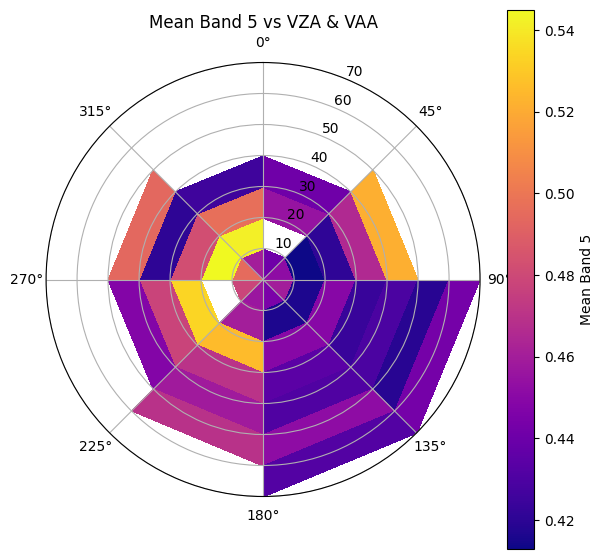

In [118]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
c = ax.pcolormesh(Theta, R, Z, shading='flat', cmap='plasma')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
fig.colorbar(c, ax=ax, label='Mean Band 5')
ax.set_title('Mean Band 5 vs VZA & VAA')
plt.show()